In [1]:
from ngsildclient import Client

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_node("toto")
G.add_node("nimp")
G.add_edge("toto", "nimp")

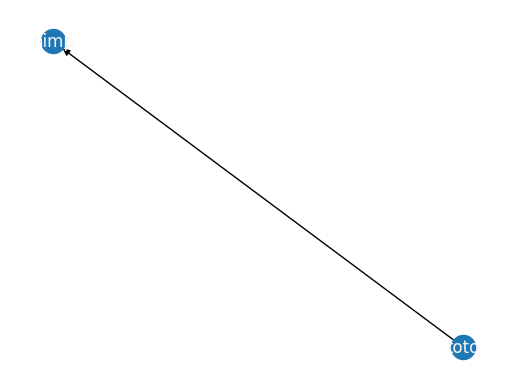

In [7]:
plt.tight_layout()
plt.axis("off")
nx.draw_networkx(G, node_color="tab:blue", font_color="whitesmoke")

In [1]:
import d3graph

In [2]:
d3graph.d3graph.edges2G(G)

AttributeError: type object 'd3graph' has no attribute 'edges2G'

In [8]:
adjmat = G.adjacency()

In [9]:
adjmat

In [13]:
from d3graph import d3graph

In [16]:
d3 = d3graph()

In [17]:
d3.graph(adjmat)

AttributeError: 'dict_itemiterator' object has no attribute 'copy'

In [20]:
from d3graph import d3graph, vec2adjmat

# Create example network
source = ['node A','node F','node B','node B','node B','node A','node C','node Z']
target = ['node F','node B','node J','node F','node F','node M','node M','node A']
weight = [5.56, 0.5, 0.64, 0.23, 0.9, 3.28, 0.5, 0.45]
# Convert to adjacency matrix
adjmat = vec2adjmat(source, target, weight=weight)

# Initialize
d3 = d3graph()
# Proces adjmat
d3.graph(adjmat)
# Plot
d3.show()


[d3graph] INFO> Set directed=True to see the markers!
[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Number of unique nodes: 7
[d3graph] INFO> Slider range is set to [0, 6]
[d3graph] INFO> Write to path: [/tmp/tmpmzknmsew/d3graph.html]


In [23]:
from ngsildclient import Client
client = Client(port=8026, port_temporal=8027)
root = client.get("A:A1")

Connected to Context Broker at localhost:8026 | vendor=Orion-LD | version=1.0.1-PRE-468


In [24]:
root

{'@context': 'https://uri.etsi.org/ngsi-ld/v1/ngsi-ld-core-context.jsonld', 'id': 'urn:ngsi-ld:A:A1', 'type': 'A', 'hasB': {'type': 'Relationship', 'object': 'urn:ngsi-ld:B:B1'}}